In [1]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [2]:
# Read data and split into different variables
filename = 'dataLeaderFollower_2019-03-18_17-31-52.csv'
data = np.genfromtxt(filename, dtype=float, delimiter=',')
curr_time = data[:, 0]
pos1 = data[:, 1:4] #3 columns
pos2 = data[:, 4:7] #3 columns
pos3 = data[:, 7:10] #3 columns
followPosErrorNorm = data[:, 10] #1 column
vec1Norm = data[:, 11] #1 column
vec2Norm = data[:, 12] #1 column
weight1 = data[:, 13] #1 column
weight2 = data[:, 14] #1 column
numCollisions = data[:, 15] #1 column
lastCollisionPoint = data[:, 16:] #last 3 columns

Plot end-effector trajectories in x-y plane

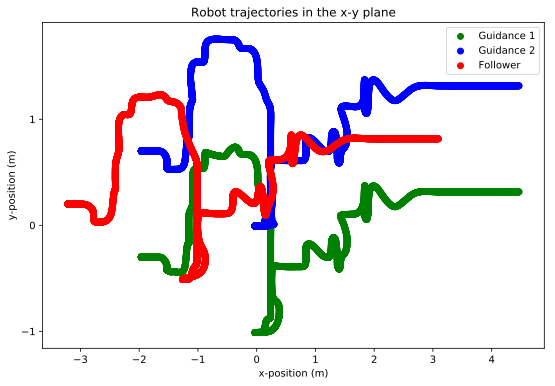

In [3]:
fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(111)

ax.scatter(pos1[:,0], pos1[:,1], color='green', label='Guidance 1')
ax.scatter(pos2[:,0], pos2[:,1], color='blue', label='Guidance 2')
sc = ax.scatter(pos3[:,0], pos3[:,1], color='red', label='Follower')

# ax.scatter(pos1[:,0], pos1[:,1], c=curr_time, cmap='hot')
# ax.scatter(pos2[:,0], pos2[:,1], c=curr_time, cmap='hot')
# sc = ax.scatter(pos3[:,0], pos3[:,1], c=curr_time, cmap='cool')

ax.set_xlabel('x-position (m)')
ax.set_ylabel('y-position (m)')
ax.set_title('Robot trajectories in the x-y plane')

# cbar = plt.colorbar(sc)
# cbar.ax.get_yaxis().labelpad = 15
# cbar.ax.set_ylabel('time (s)', rotation=90)

ax.yaxis.set_major_locator(MaxNLocator(integer=True))

# Shrink current axis by 20%
# box = ax.get_position()
# ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
# ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.legend(loc='best')

plt.savefig('Plots/' + filename + 'trajXY.png', dpi=300)

plt.show()

Plot end-effector trajectories along z-axis

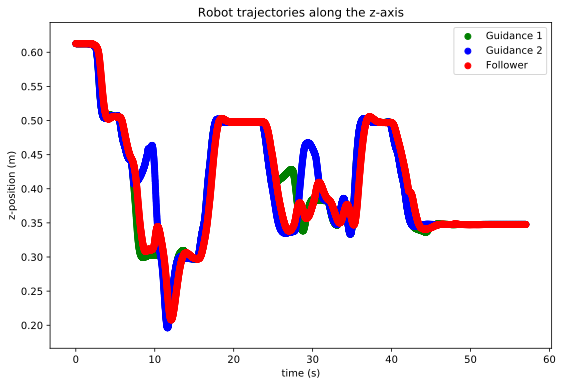

In [4]:
fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(111)

ax.scatter(curr_time, pos1[:,2], color='green', label='Guidance 1')
ax.scatter(curr_time, pos2[:,2], color='blue', label='Guidance 2')
sc = ax.scatter(curr_time, pos3[:,2], color='red', label='Follower')

# ax.scatter(pos1[:,0], pos1[:,1], c=curr_time, cmap='hot')
# ax.scatter(pos2[:,0], pos2[:,1], c=curr_time, cmap='hot')
# sc = ax.scatter(pos3[:,0], pos3[:,1], c=curr_time, cmap='cool')

ax.set_xlabel('time (s)')
ax.set_ylabel('z-position (m)')
ax.set_title('Robot trajectories along the z-axis')

# cbar = plt.colorbar(sc)
# cbar.ax.get_yaxis().labelpad = 15
# cbar.ax.set_ylabel('time (s)', rotation=90)

ax.yaxis.set_major_locator(MaxNLocator(integer=True))

# Shrink current axis by 20%
# box = ax.get_position()
# ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
# ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.legend(loc='best')

plt.savefig('Plots/' + filename + 'trajZ.png', dpi=300)

plt.show()

Plot follower position and obstacles over time

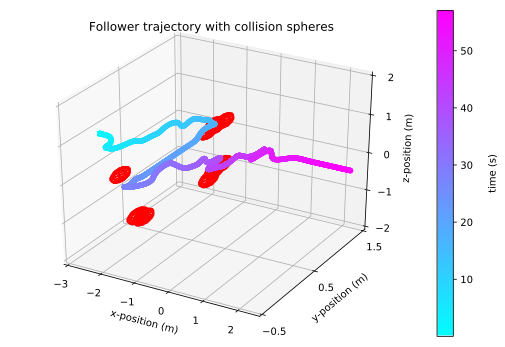

In [5]:
radius = 0.15

# data for drawing spheres
u, v = np.mgrid[0:2*np.pi:10j, 0:np.pi:10j]
x = radius * np.cos(u)*np.sin(v)
y = radius * np.sin(u)*np.sin(v)
z = radius * np.cos(v)

fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(111, projection='3d')
# ax.set_aspect('equal')

sc = ax.scatter(pos3[:,0], pos3[:,1], pos3[:,2], c=curr_time, cmap='cool')

# ax.plot_wireframe(x, y, z, color='r')
# ax.set_aspect('equal', 'box')
# ax.axis('equal')

X = []
Y = []
Z = []

# draw collision spheres
prevNumCollisions = numCollisions[0]
for i in range(len(data)):
    if numCollisions[i] != prevNumCollisions:
        ax.plot_wireframe(lastCollisionPoint[i,0]+x, lastCollisionPoint[i,1]+y, lastCollisionPoint[i,2]+z, color='r')
        X.append(lastCollisionPoint[i,0]+x)
        Y.append(lastCollisionPoint[i,1]+y)
        Z.append(lastCollisionPoint[i,2]+z)
        prevNumCollisions = numCollisions[i]
        
max_range = np.array([np.max(pos3[:,0])-np.min(pos3[:,0]), np.max(pos3[:,1])-np.min(pos3[:,1]), np.max(pos3[:,2])-np.min(pos3[:,2])]).max() / 2.0
# max_range = np.array([np.max(X)-np.min(X), np.max(Y)-np.min(Y), np.max(Z)-np.min(Z)]).max() / 2.0
# max_range = np.array([np.max(pos3[:,0])-np.min(pos3[:,0]), np.max(pos3[:,1])-np.min(pos3[:,1]), np.max(Z)-np.min(Z)]).max() / 2.0

mid_x = (np.max(pos3[:,0])+np.min(pos3[:,0])) * 0.5
mid_y = (np.max(pos3[:,1])+np.min(pos3[:,1])) * 0.5
mid_z = (np.max(pos3[:,2])+np.min(pos3[:,2])) * 0.5
# mid_x = (np.max(X)+np.min(X)) * 0.5
# mid_y = (np.max(Y)+np.min(Y)) * 0.5
# mid_z = (np.max(Z)+np.min(Z)) * 0.5

# ax.set_xlim(mid_x - max_range, mid_x + max_range)
# ax.set_ylim(mid_y - max_range, mid_y + max_range)
# ax.set_zlim(mid_z - max_range, mid_z + max_range)

ax.set_xlim(-3, 2.5)
ax.set_xticks((-3, -2, -1, 0, 1, 2))
ax.set_ylim(-0.5, 1.5)
ax.set_yticks((-0.5, 0.5, 1.5))
ax.set_zlim(-2, 2)
ax.set_zticks((-2, -1, 0, 1, 2))

ax.set_xlabel('x-position (m)')
ax.set_ylabel('y-position (m)')
ax.set_zlabel('z-position (m)')
ax.set_title('Follower trajectory with collision spheres')

cbar = plt.colorbar(sc)
cbar.ax.get_yaxis().labelpad = 15
cbar.ax.set_ylabel('time (s)', rotation=90)

plt.savefig('Plots/' + filename + 'trajFollower.png', dpi=300)
        
plt.show()

Plot guidance weights over time

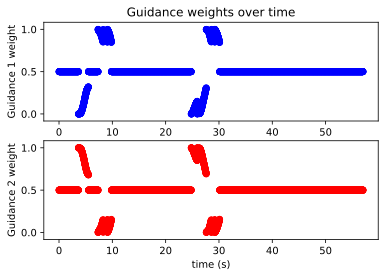

In [6]:
fig = plt.figure()
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

ax1.scatter(curr_time, weight1, color='blue')
ax2.scatter(curr_time, weight2, color='red')

ax1.set_ylabel('Guidance 1 weight')
ax1.set_title('Guidance weights over time')
ax2.set_ylabel('Guidance 2 weight')
ax2.set_xlabel('time (s)')

plt.savefig('Plots/' + filename + 'weights.png', dpi=300)

plt.show()